# Izazov: Analiza teksta o podatkovnoj znanosti

U ovom primjeru, napravit ćemo jednostavnu vježbu koja obuhvaća sve korake tradicionalnog procesa podatkovne znanosti. Ne morate pisati nikakav kod, samo možete kliknuti na ćelije ispod kako biste ih izvršili i promatrali rezultat. Kao izazov, potičemo vas da isprobate ovaj kod s različitim podacima.

## Cilj

U ovoj lekciji raspravljali smo o različitim konceptima vezanim uz podatkovnu znanost. Pokušajmo otkriti više povezanih koncepata radeći **rudarenje teksta**. Počet ćemo s tekstom o podatkovnoj znanosti, izvući ključne riječi iz njega, a zatim pokušati vizualizirati rezultat.

Kao tekst koristit ćemo stranicu o podatkovnoj znanosti s Wikipedije:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Korak 1: Dobivanje podataka

Prvi korak u svakom procesu obrade podataka je dobivanje podataka. Koristit ćemo biblioteku `requests` za to:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Korak 2: Transformacija podataka

Sljedeći korak je pretvoriti podatke u oblik prikladan za obradu. U našem slučaju, preuzeli smo HTML izvorni kod sa stranice i trebamo ga pretvoriti u običan tekst.

Postoji mnogo načina kako se to može učiniti. Koristit ćemo najjednostavniji ugrađeni objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) iz Pythona. Potrebno je naslijediti klasu `HTMLParser` i definirati kod koji će prikupljati sav tekst unutar HTML oznaka, osim oznaka `<script>` i `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Korak 3: Dobivanje uvida

Najvažniji korak je pretvoriti naše podatke u oblik iz kojeg možemo izvući uvide. U našem slučaju, želimo izdvojiti ključne riječi iz teksta i vidjeti koje su ključne riječi značajnije.

Koristit ćemo Python biblioteku pod nazivom [RAKE](https://github.com/aneesha/RAKE) za izdvajanje ključnih riječi. Prvo, instalirajmo ovu biblioteku ako već nije prisutna:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Glavna funkcionalnost dostupna je iz objekta `Rake`, koji možemo prilagoditi pomoću nekih parametara. U našem slučaju, postavit ćemo minimalnu duljinu ključne riječi na 5 znakova, minimalnu učestalost ključne riječi u dokumentu na 3, i maksimalan broj riječi u ključnoj riječi na 2. Slobodno eksperimentirajte s drugim vrijednostima i promatrajte rezultat.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Dobili smo popis pojmova zajedno s pripadajućim stupnjem važnosti. Kao što možete vidjeti, najrelevantnije discipline, poput strojnog učenja i velikih podataka, nalaze se na vrhu popisa.

## Korak 4: Vizualizacija rezultata

Ljudi najbolje interpretiraju podatke u vizualnom obliku. Stoga često ima smisla vizualizirati podatke kako bismo izvukli određene uvide. Možemo koristiti biblioteku `matplotlib` u Pythonu za prikaz jednostavne distribucije ključnih riječi s njihovom relevantnošću:


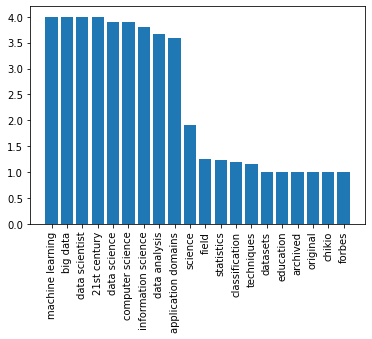

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Postoji, međutim, još bolji način za vizualizaciju učestalosti riječi - korištenjem **Word Cloud**. Trebat ćemo instalirati još jednu biblioteku kako bismo prikazali word cloud iz našeg popisa ključnih riječi.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` objekt je odgovoran za primanje ili originalnog teksta, ili unaprijed izračunatog popisa riječi s njihovim frekvencijama, i vraća sliku, koja se zatim može prikazati pomoću `matplotlib`:


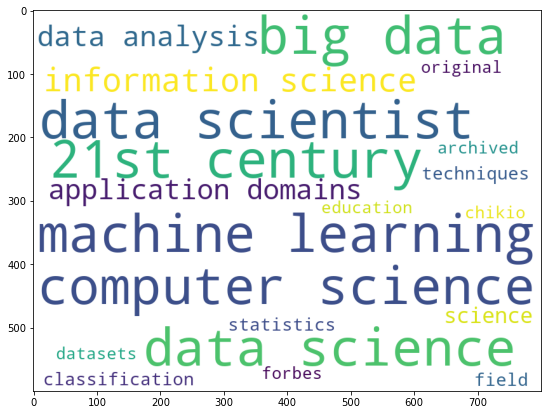

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Izvorni tekst možemo također proslijediti u `WordCloud` - pogledajmo možemo li dobiti sličan rezultat:


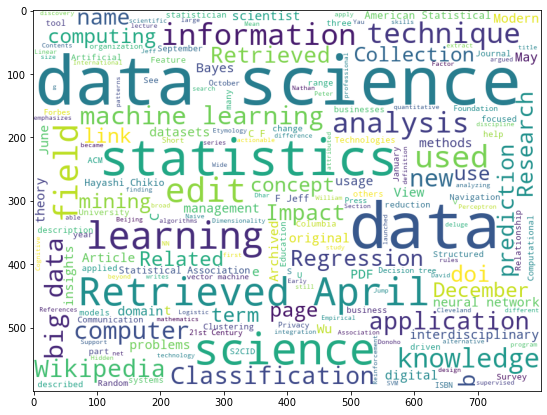

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Možete vidjeti da sada oblak riječi izgleda impresivnije, ali također sadrži puno šuma (npr. nepovezane riječi poput `Retrieved on`). Također, dobivamo manje ključnih riječi koje se sastoje od dvije riječi, poput *data scientist* ili *computer science*. To je zato što RAKE algoritam puno bolje odabire dobre ključne riječi iz teksta. Ovaj primjer naglašava važnost predobrade i čišćenja podataka, jer će nam jasnija slika na kraju omogućiti donošenje boljih odluka.

U ovoj vježbi prošli smo kroz jednostavan proces izvlačenja značenja iz Wikipedijinog teksta, u obliku ključnih riječi i oblaka riječi. Ovaj primjer je prilično jednostavan, ali dobro prikazuje sve tipične korake koje će podatkovni znanstvenik poduzeti pri radu s podacima, počevši od prikupljanja podataka pa sve do vizualizacije.

Na našem tečaju detaljno ćemo raspraviti sve te korake.



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden pomoću AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati autoritativnim izvorom. Za ključne informacije preporučuje se profesionalni prijevod od strane ljudskog prevoditelja. Ne preuzimamo odgovornost za bilo kakve nesporazume ili pogrešne interpretacije koje proizlaze iz korištenja ovog prijevoda.
